## Exploring Hacker News Posts


In this project, we will explore and analyze a set of posts on the Hacker News website.
Hacker News is a popular community where users post news, questions and thoughts on new technologies.

Below are a couple of popular categories of posts on the website:

**Ask HN:**  Users submit Ask HN posts to ask the Hacker News community a specific question.

**Show HN:**  Users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting.

For this project, we will be comparing Ask HN posts with Show HN posts to determine if either of the two categories receive more comments on average. Also we will determine if posts created at a certain time of day receive more comments on average.


#### Importing Libraries and Data
To begin this project we will import the libraries that will be needed for the analysis as well as the data itself.

In [1]:
import csv
opened_file = open('hacker_news.csv', encoding='utf8')
read_file = csv.reader(opened_file)
hn = list(read_file)

hn[:5]

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'],
 ['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01']]

Now, to aid in the analysis of the data we will isolate the Header Row from our list of posts and save it as variable 'headers'. We will save the body of the posts information as 'hn' (hn standing for Hacker News)

In [2]:
headers = hn[0]

hn = hn[1:]
hn[:5]


[['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01'],
 ['10301696',
  'Note by Note: The Making of Steinway L1037 (2007)',
  'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
  '8',
  '2',
  'walterbell',
  '9/30/2015 4:12']]

Create lists containing ask posts, show posts, and other posts.

In [3]:
ask_posts = []
show_posts = []
other_posts = []

for entry in hn:
    title = entry[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(entry)
    elif title.lower().startswith('show hn'):
        show_posts.append(entry)
    else:
        other_posts.append(entry)
        
print(len(ask_posts))
print(len(show_posts))
print(len(other_posts))

        

1744
1162
17194


In [4]:
total_ask_comments = 0

for post in ask_posts:
    num_comments = int(post[4])
    total_ask_comments = total_ask_comments + num_comments
    
avg_ask_comments = total_ask_comments / len(ask_posts)
print('The average number of comments for a post in the "ask" category is: ' + str(round(avg_ask_comments,2)))

total_show_comments = 0

for post in show_posts:
    num_comments = int(post[4])
    total_show_comments = total_show_comments + num_comments
    
avg_show_comments = total_show_comments / len(show_posts)
print('The average number of comments for a post in the "show" category is: ' + str(round(avg_show_comments,2)))




The average number of comments for a post in the "ask" category is: 14.04
The average number of comments for a post in the "show" category is: 10.32


On average, ask posts receive approximately 14 comments, while show posts receive approximately 10 comments according to our dataset.

Now it might be useful to know whether ask posts that are posted at a particular time of day are more frequently commented upon. We will examine below.

In [5]:
import datetime as dt
result_list = []

for post in ask_posts:
    created_at = post[6]
    num_comments = int(post[4])
    results = [created_at, num_comments]
    result_list.append(results)

counts_by_hour = {}
comments_by_hour = {}

for i in result_list:
    num_comments = i[1]
    date_string = i[0]
    date_dt = dt.datetime.strptime(date_string,'%m/%d/%Y %H:%M')
    hour = date_dt.strftime('%H')
    if hour in counts_by_hour:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += num_comments
    else:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = num_comments

print(counts_by_hour)
print(comments_by_hour)

{'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}
{'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}


In [6]:
avg_by_hour = []

for hour in counts_by_hour:
    avg_by_hour.append([hour, comments_by_hour[hour]/counts_by_hour[hour]])
print(avg_by_hour)

[['09', 5.5777777777777775], ['13', 14.741176470588234], ['10', 13.440677966101696], ['14', 13.233644859813085], ['16', 16.796296296296298], ['23', 7.985294117647059], ['12', 9.41095890410959], ['17', 11.46], ['15', 38.5948275862069], ['21', 16.009174311926607], ['20', 21.525], ['02', 23.810344827586206], ['18', 13.20183486238532], ['03', 7.796296296296297], ['05', 10.08695652173913], ['19', 10.8], ['01', 11.383333333333333], ['22', 6.746478873239437], ['08', 10.25], ['04', 7.170212765957447], ['00', 8.127272727272727], ['06', 9.022727272727273], ['07', 7.852941176470588], ['11', 11.051724137931034]]


In [7]:
swap_avg_by_hour = []
for i in avg_by_hour:
    swap_avg_by_hour.append([i[1],i[0]])
    
#print(swap_avg_by_hour)

sorted_swap = sorted(swap_avg_by_hour, reverse = True)
#print(sorted_swap)
print("Top 5 Hours for Ask Posts Comments")
for i in sorted_swap[:4]:
    print('{}:00: {:.2f} average comments per post'.format(str(int(i[1])),(i[0])))
    

Top 5 Hours for Ask Posts Comments
15:00: 38.59 average comments per post
2:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[8.13, 11.38, 23.81, 7.8, 7.17, 10.09, 9.02, 7.85, 10.25, 5.58, 13.44, 11.05, 9.41, 14.74, 13.23, 38.59, 16.8, 11.46, 13.2, 10.8, 21.52, 16.01, 6.75, 7.99]


Text(0, 0.5, 'Average Post Comments')

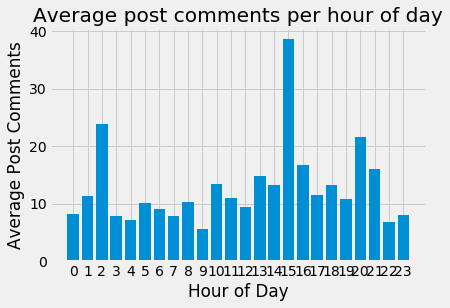

In [28]:
sorted_avg = sorted(avg_by_hour)
hist_hours = []
hist_avg_ratings = []
for i in sorted_avg:
    hist_hours.append(int(i[0]))
    hist_avg_ratings.append((round(i[1], 2)))
print(hist_hours)
print(hist_avg_ratings)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


plt.bar(hist_hours,hist_avg_ratings, label="AVG XXX")
plt.title("Average post comments per hour of day")
x_indexes = np.arange(len(hist_hours))
plt.xticks(ticks=x_indexes, labels = hist_hours)
plt.xlabel("Hour of Day")
plt.ylabel("Average Post Comments")







